# VGG 16

### Importing required libraries

In [2]:
%pylab inline
from fastai.vision import *
from pathlib import Path
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Loading our dataset:

In [3]:
path=Path('Data Annotation')

In [4]:
path.ls()

[PosixPath('Data Annotation/Blouse'),
 PosixPath('Data Annotation/Table'),
 PosixPath('Data Annotation/Sweatshirt'),
 PosixPath('Data Annotation/Pant'),
 PosixPath('Data Annotation/Shirt'),
 PosixPath('Data Annotation/Jacket'),
 PosixPath('Data Annotation/Dress'),
 PosixPath('Data Annotation/Shorts'),
 PosixPath('Data Annotation/Sweater'),
 PosixPath('Data Annotation/Skirt'),
 PosixPath('Data Annotation/Tshirts')]

In [38]:
data = ImageDataBunch.from_folder(f'{path}', valid_pct=0.2, size=224, bs=16).normalize(imagenet_stats)

In [39]:
data.classes

['Blouse',
 'Dress',
 'Jacket',
 'Pant',
 'Shirt',
 'Shorts',
 'Skirt',
 'Sweater',
 'Sweatshirt',
 'Table',
 'Tshirts']

### Some examples of from our annotated dataset:

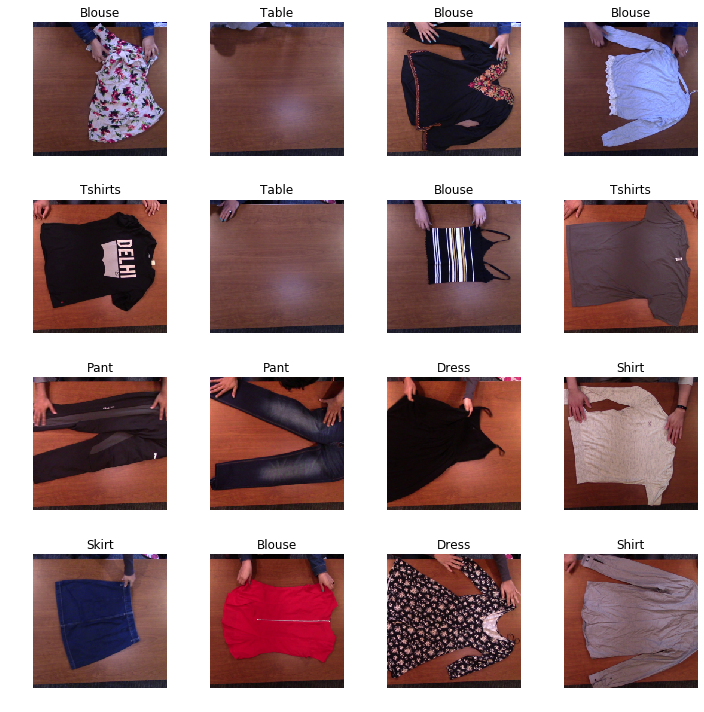

In [41]:
data.show_batch(figsize=(10,10))

### Experimenting with VGG16 Model:

In [42]:
learn=cnn_learner(data, models.vgg16_bn, metrics=accuracy)

In [43]:
learn.freeze()

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


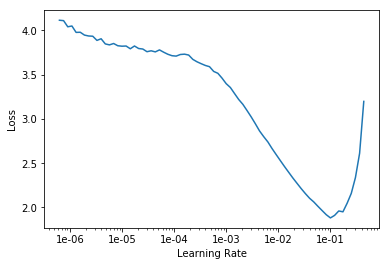

In [45]:
learn.recorder.plot()

In [46]:
lr=5e-3
learn.fit_one_cycle(4, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.796902,1.157904,0.731707,00:08
1,1.435031,0.428985,0.902439,00:07
2,0.897398,0.287101,0.951219,00:07
3,0.609666,0.236323,0.975610,00:07


In [47]:
learn.unfreeze()

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


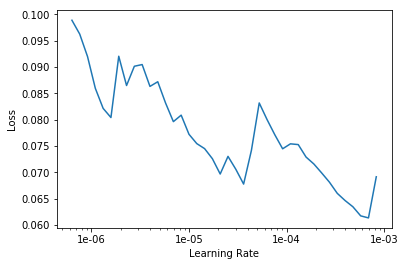

In [49]:
learn.recorder.plot()

In [50]:
lr=1e-5
learn.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.164663,0.216483,0.975610,00:07
1,0.107027,0.193445,0.975610,00:07
2,0.080437,0.191355,0.951219,00:07
3,0.076247,0.193166,0.951219,00:07
4,0.061791,0.196285,0.951219,00:07
5,0.054682,0.191307,0.951219,00:07
6,0.051925,0.182602,0.975610,00:07
7,0.050714,0.184815,0.975610,00:07


### Observation:
* We achieve an accuracy of 97.56%. Alongside the loss on validation set decreases continuously with number of epochs. 
* The confusion matrix displayes below shows that one 'sweater' from validation dataset is classified as 'pant'.
* The top losses indicate the one image which is wrongly classified whereas for others, even if they are a part of top_losses, the classification for those images is correct.
* Good results are observed here but this can also be because our dataset is comparatively small. 
* Next experiments will consist of generating longer video, pre-processing, image extraction and annotation. Combining the dataset to create a bigger dataset and then observe the performance of different models. 

In [51]:
interp=ClassificationInterpretation.from_learner(learn)

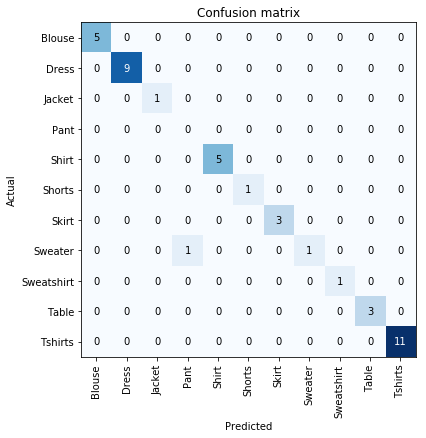

In [52]:
interp.plot_confusion_matrix(figsize=(6,6))

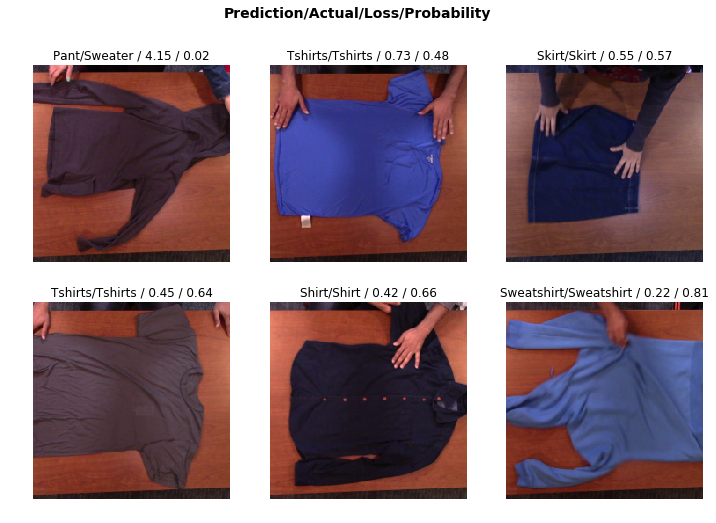

In [53]:
interp.plot_top_losses(k=6, figsize=(12, 8))